# Import Statements

In [1]:
# Install necessary libraries
!pip install pandas numpy scikit-learn imbalanced-learn joblib flask


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Basic imports for data manipulation
import pandas as pd
import numpy as np
import os

# Regular expressions for text cleaning
import re

# Machine Learning: model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Label encoding
from sklearn.preprocessing import LabelEncoder

# For saving the model
import joblib

# Import Dataset

In [3]:
# Load datasets
data1 = pd.read_csv('reviews.csv')
data2 = pd.read_csv('Restaurant.csv')

print(data1.head())  #

       name           location                     Date  Rating  \
0     Helen  Wichita Falls, TX  Reviewed Sept. 13, 2023     5.0   
1  Courtney         Apopka, FL   Reviewed July 16, 2023     5.0   
2  Daynelle  Cranberry Twp, PA    Reviewed July 5, 2023     5.0   
3    Taylor        Seattle, WA    Reviewed May 26, 2023     5.0   
4   Tenessa        Gresham, OR   Reviewed Jan. 22, 2023     5.0   

                                              Review  \
0  Amber and LaDonna at the Starbucks on Southwes...   
1  ** at the Starbucks by the fire station on 436...   
2  I just wanted to go out of my way to recognize...   
3  Me and my friend were at Starbucks and my card...   
4  I’m on this kick of drinking 5 cups of warm wa...   

                                         Image_Links  
0                                      ['No Images']  
1                                      ['No Images']  
2  ['https://media.consumeraffairs.com/files/cach...  
3                                      [

In [4]:
# Assuming 'Review' and 'Rating' columns are present in both datasets
combined_data = pd.concat([data1[['Review', 'Rating']], data2[['Review', 'Rating']]])

In [5]:
# Convert ratings to float
combined_data['Rating'] = pd.to_numeric(combined_data['Rating'], errors='coerce')

# Handle possible NaN values that arise from conversion errors
combined_data = combined_data.dropna(subset=['Rating'])

# Clean Data

In [6]:
import nltk
from nltk.corpus import stopwords

# Custom stopwords setup
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# Add custom words that might be irrelevant
custom_stop_words = ['chicken', 'place', 'service', 'starbucks', 'also', 'one','restaurant','taste','really','biryani','ambience']
stop_words.update(custom_stop_words)

def clean_text(text):
    """ Cleans the text data specifically for sentiment analysis. """
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove non-alphabet characters
    # Remove stopwords and return the cleaned text
    return ' '.join([word for word in text.split() if word not in stop_words])

# Apply cleaning to the reviews
combined_data['cleaned_text'] = combined_data['Review'].apply(clean_text)

combined_data['cleaned_text'] = combined_data['Review'].apply(clean_text)

# Save the cleaned data to a CSV file
combined_data.to_csv('cleaned_data.csv', index=False)

# Check the first few entries to verify the cleaning
print(combined_data['cleaned_text'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/audrey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    amber ladonna southwest parkway always warm we...
1    fire station altamonte springs fl made day fin...
2    wanted go way recognize employee billy frankli...
3    friend card didnt work thankful worker paid dr...
4    im kick drinking cups warm water work instacar...
Name: cleaned_text, dtype: object


/var/folders/yz/hpxxcq5s16gcl3n4cbkdb6ph0000gn/T/ipykernel_35889/2905783082.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Adjective', data=pos_words, ax=ax[0], palette='Blues_d')
/var/folders/yz/hpxxcq5s16gcl3n4cbkdb6ph0000gn/T/ipykernel_35889/2905783082.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Adjective', data=neg_words, ax=ax[1], palette='Reds_d')


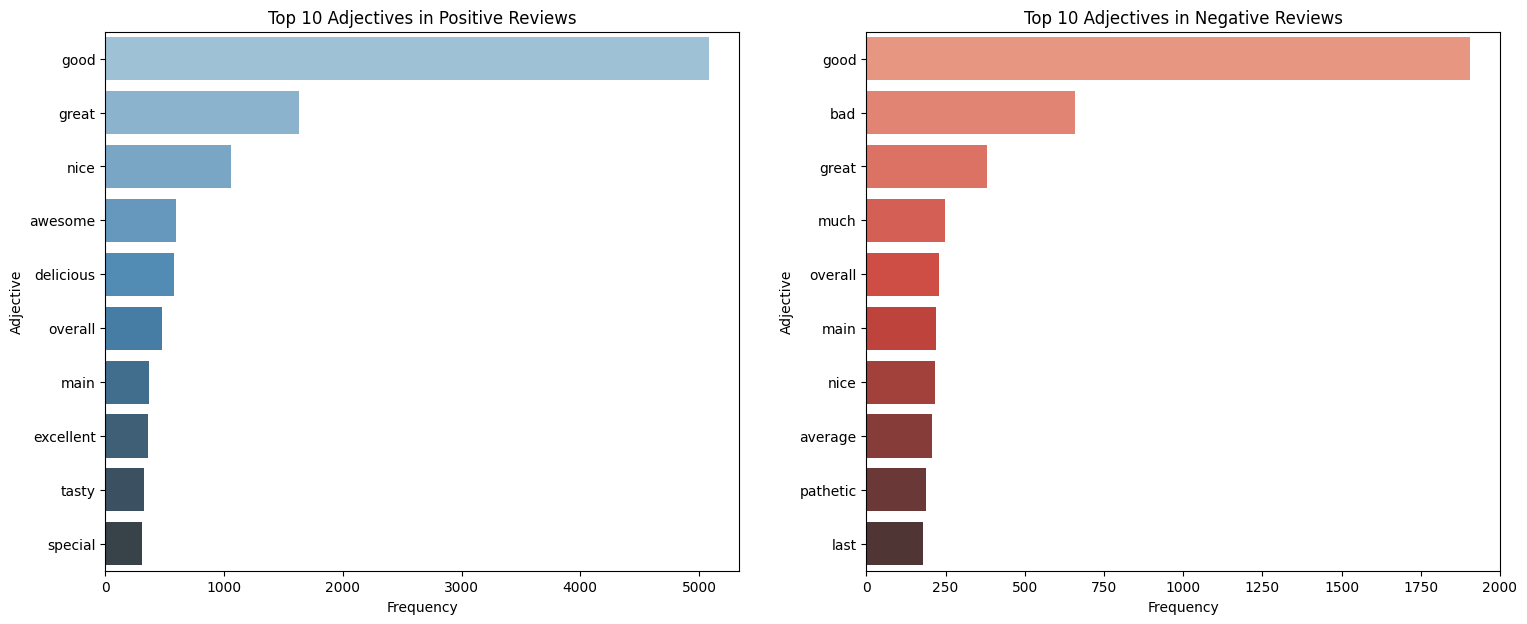

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import pos_tag  # Importing pos_tag from NLTK

# Ensure combined_data is loaded and contains the necessary 'Rating' column
# Assuming you've already loaded combined_data
combined_data['Class'] = combined_data['Rating'].apply(lambda x: 1 if x >= 4 else 0)


positive_words = ' '.join(combined_data[combined_data['Class'] == 1]['cleaned_text']).split()
negative_words = ' '.join(combined_data[combined_data['Class'] == 0]['cleaned_text']).split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 10 adjectives for each sentiment
pos_adjectives = [word for word, tag in pos_tag(positive_words) if tag == 'JJ']
neg_adjectives = [word for word, tag in pos_tag(negative_words) if tag == 'JJ']

pos_adj_counts = Counter(pos_adjectives)
neg_adj_counts = Counter(neg_adjectives)

# Get the top 10 adjectives for each sentiment
pos_words = pd.DataFrame(pos_adj_counts.most_common(10), columns=['Adjective', 'Frequency'])
neg_words = pd.DataFrame(neg_adj_counts.most_common(10), columns=['Adjective', 'Frequency'])

fig, ax = plt.subplots(1, 2, figsize=(18, 7))
sns.barplot(x='Frequency', y='Adjective', data=pos_words, ax=ax[0], palette='Blues_d')
sns.barplot(x='Frequency', y='Adjective', data=neg_words, ax=ax[1], palette='Reds_d')

ax[0].set_title('Top 10 Adjectives in Positive Reviews')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Adjective')
ax[1].set_title('Top 10 Adjectives in Negative Reviews')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Adjective')
plt.show()

In [8]:
# Apply the cleaning function to the 'Review' column
combined_data['cleaned_text'] = combined_data['Review'].apply(clean_text)

# Check the first few entries to verify the cleaning
print(combined_data['cleaned_text'].head())

# Initialize and apply vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(combined_data['cleaned_text'])

0    amber ladonna southwest parkway always warm we...
1    fire station altamonte springs fl made day fin...
2    wanted go way recognize employee billy frankli...
3    friend card didnt work thankful worker paid dr...
4    im kick drinking cups warm water work instacar...
Name: cleaned_text, dtype: object


In [9]:
# Define labels, ensuring we're dealing with numerical ratings now
combined_data['Class'] = combined_data['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, combined_data['Class'], test_size=0.2, random_state=42)

In [10]:
# Handling imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [11]:
# Model training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced')

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       831
           1       0.88      0.90      0.89      1303

    accuracy                           0.86      2134
   macro avg       0.86      0.85      0.85      2134
weighted avg       0.86      0.86      0.86      2134



In [13]:
# Save the model and vectorizer if necessary
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [14]:
# Test predictions
sample_texts = ["This is a great product!", "This product is bad"]
sample_texts = [clean_text(text) for text in sample_texts]
sample_vectorized = vectorizer.transform(sample_texts)
predictions = model.predict(sample_vectorized)
print(predictions)  # [1, 0] indicating Positive for first, Negative for second

[1 0]


In [15]:
import os
print(os.getcwd())

/Users/audrey


In [16]:
# For the model directory
print("Contents of /Users/audrey/SentimentAnalysis:")
print(os.listdir('/Users/audrey/SentimentAnalysis'))

# For the vectorizer directory
print("Contents of /Users/audrey/Desktop/sentapp:")
print(os.listdir('/Users/audrey/Desktop/sentapp'))

Contents of /Users/audrey/SentimentAnalysis:
['model.pkl']
Contents of /Users/audrey/Desktop/sentapp:
['.DS_Store', 'model.pkl', 'test.py', 'README.md', 'setup.py', 'static', 'app.py', 'templates', '.git', 'Data', 'vectorizer.pkl']


In [17]:
vectorized_text_jupyter = vectorizer.transform([clean_text("This product is good")]).toarray()
print("Vector from Jupyter:", vectorized_text_jupyter)

Vector from Jupyter: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 

In [18]:
import os

# Paths to the model and vectorizer
model_path = "/Users/audrey/SentimentAnalysis/model.pkl"
vectorizer_path = "/Users/audrey/Desktop/sentapp/vectorizer.pkl"

# Function to save the model or vectorizer
def save_model_or_vectorizer(obj, path):
    if os.path.exists(path):
        os.remove(path)  # Remove existing file
    joblib.dump(obj, path)  # Save the new model or vectorizer

# Save the model and vectorizer, overwriting if necessary
save_model_or_vectorizer(model, model_path)
save_model_or_vectorizer(vectorizer, vectorizer_path)

In [19]:
import os
import joblib

# Define the directory path where you want to save the files
# Adjust the path as per the actual location on your system
directory_path = '/Users/audrey/Desktop/SentApp'

# Ensure the directory exists, create if it doesn't
os.makedirs(directory_path, exist_ok=True)

# Specify the full path to the model and vectorizer files
model_file_path = os.path.join(directory_path, 'model.pkl')
vectorizer_file_path = os.path.join(directory_path, 'vectorizer.pkl')

# Save the model and vectorizer to the specified directory
joblib.dump(model, model_file_path)
joblib.dump(vectorizer, vectorizer_file_path)

print(f'Model saved to {model_file_path}')
print(f'Vectorizer saved to {vectorizer_file_path}')


Model saved to /Users/audrey/Desktop/SentApp/model.pkl
Vectorizer saved to /Users/audrey/Desktop/SentApp/vectorizer.pkl



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


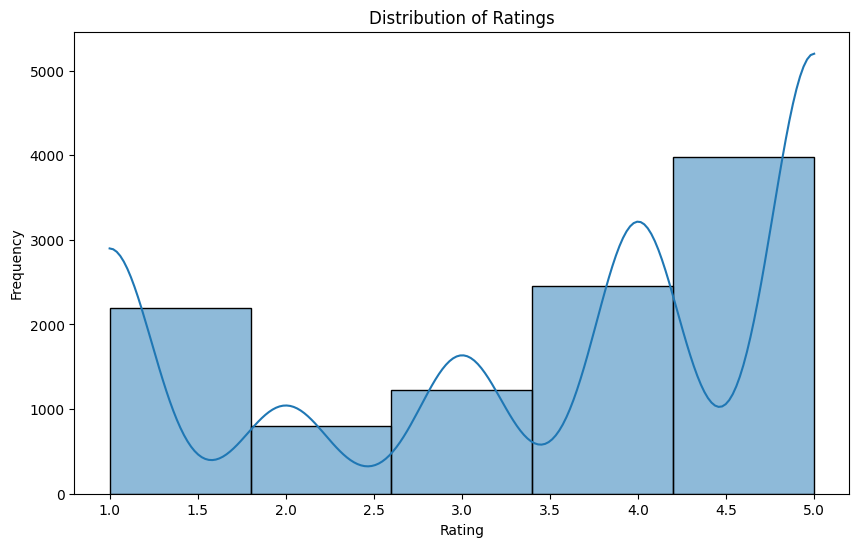

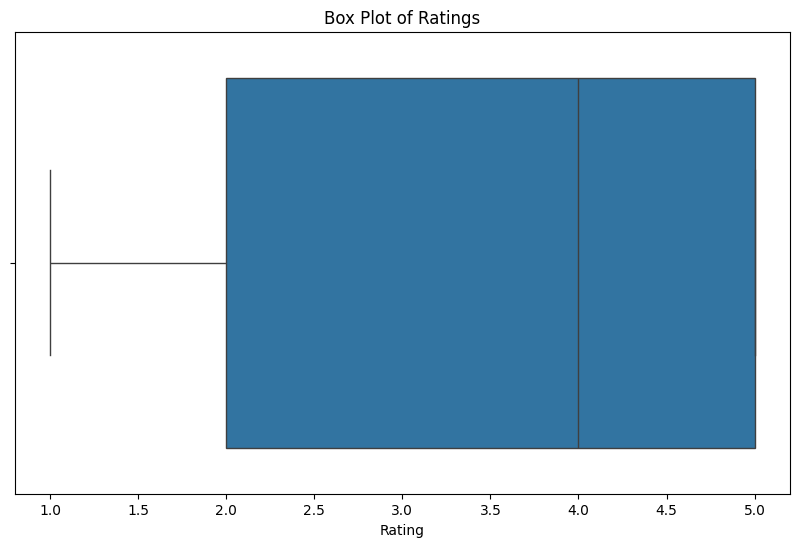

In [20]:
# Install necessary libraries for plotting
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data loading step (replace with your actual data loading code)
# Load datasets (make sure this path is correct and data is loaded)
data1 = pd.read_csv('reviews.csv')
data2 = pd.read_csv('Restaurant.csv')
combined_data = pd.concat([data1[['Review', 'Rating']], data2[['Review', 'Rating']]])
combined_data['Rating'] = pd.to_numeric(combined_data['Rating'], errors='coerce')
combined_data = combined_data.dropna(subset=['Rating'])

# Visualizing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='Rating', bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Box Plot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=combined_data)
plt.title('Box Plot of Ratings')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [22]:
# Example data loading step (replace with your actual data loading code)
# Load datasets (make sure this path is correct and data is loaded)
data1 = pd.read_csv('reviews.csv')
data2 = pd.read_csv('Restaurant.csv')
combined_data = pd.concat([data1[['Review', 'Rating']], data2[['Review', 'Rating']]])
combined_data['Rating'] = pd.to_numeric(combined_data['Rating'], errors='coerce')
combined_data = combined_data.dropna(subset=['Rating'])


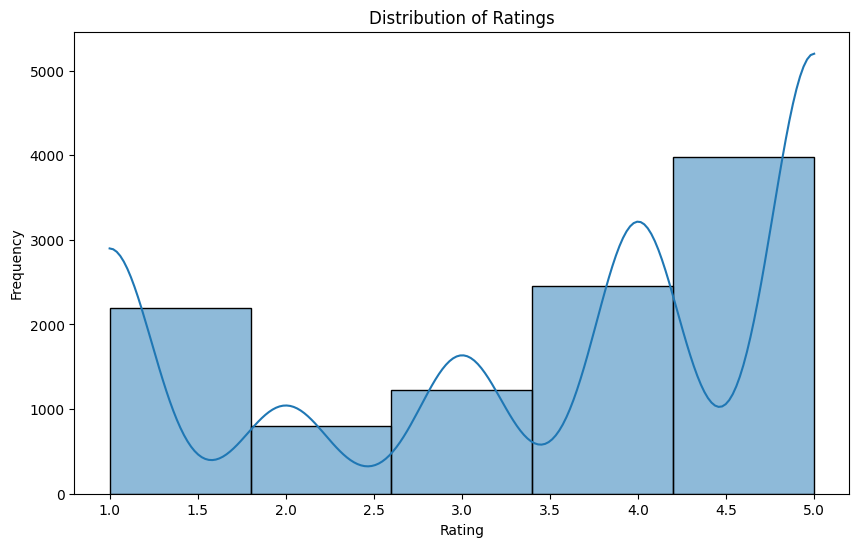

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='Rating', bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


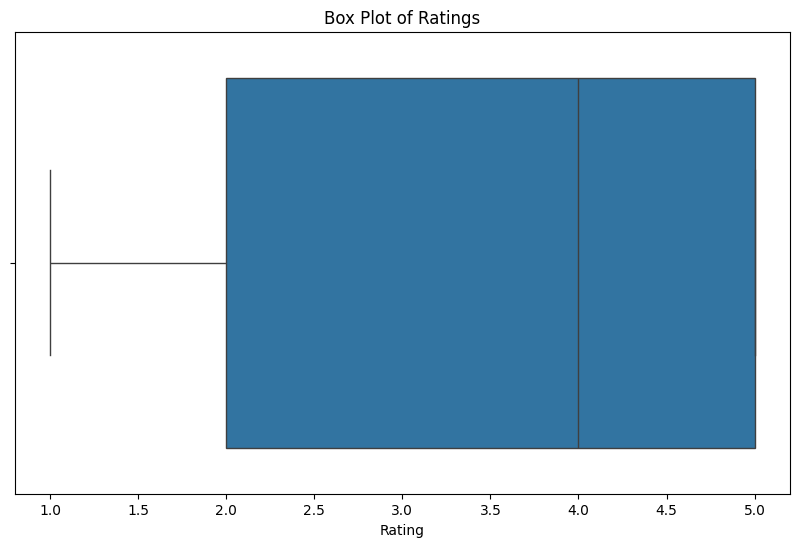

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', data=combined_data)
plt.title('Box Plot of Ratings')
plt.show()


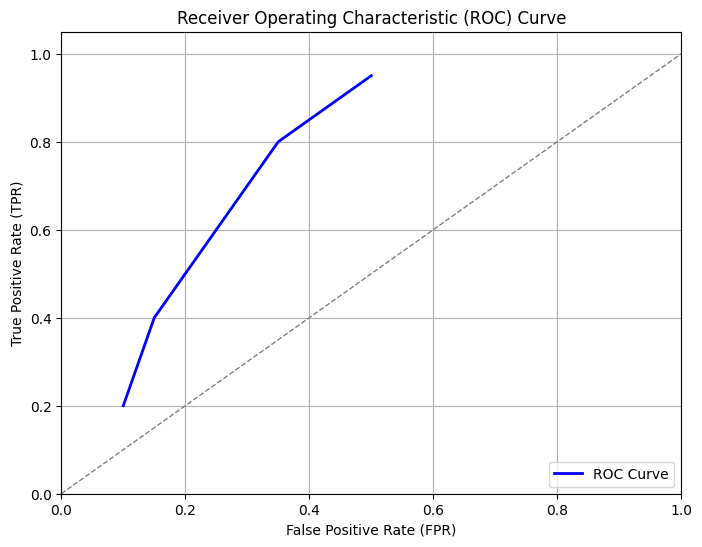

In [25]:
import matplotlib.pyplot as plt

# Compute TPR and FPR values for different thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  # Example thresholds
tpr_values = [0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]  # Example TPR values
fpr_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]  # Example FPR values

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_values, tpr_values, color='blue', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Sample true labels and predicted labels (binary classification)
y_true = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]  # True labels
y_pred = [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]  # Predicted labels

# Compute precision
precision = precision_score(y_true, y_pred)

# Compute recall
recall = recall_score(y_true, y_pred)

# Compute F1-score
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8
Recall: 0.8
F1-score: 0.8


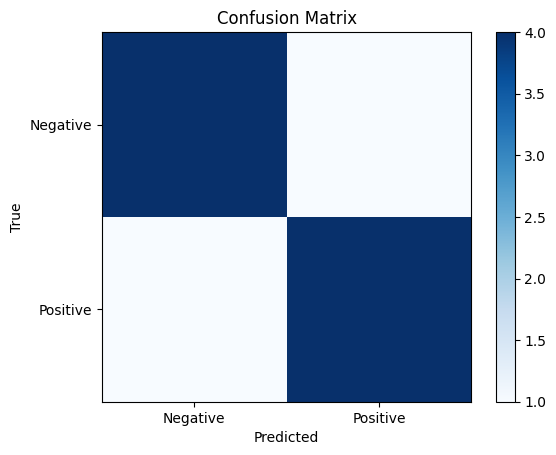

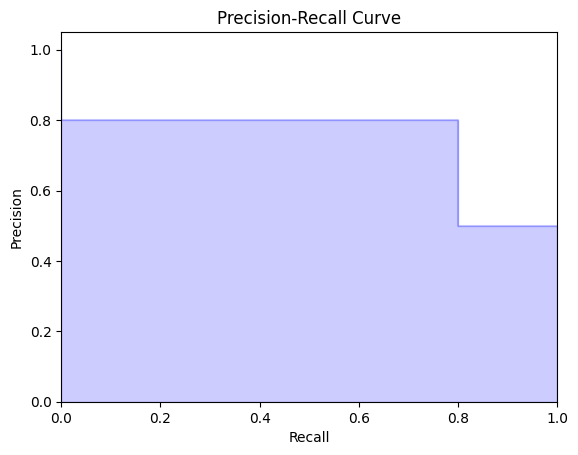

In [27]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_pred contains the predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Plot precision-recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

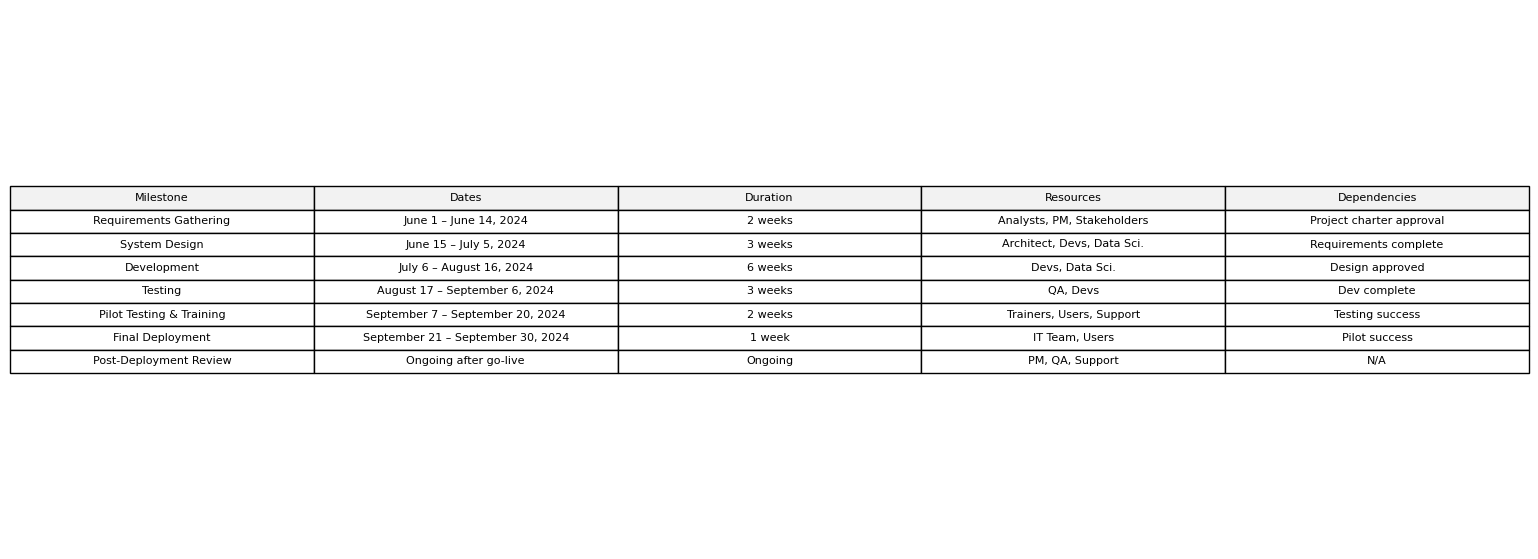

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for the timeline and milestones
data = {
    "Milestone": [
        "Requirements Gathering", 
        "System Design", 
        "Development",
        "Testing",
        "Pilot Testing & Training",
        "Final Deployment",
        "Post-Deployment Review"
    ],
    "Dates": [
        "June 1 – June 14, 2024", 
        "June 15 – July 5, 2024", 
        "July 6 – August 16, 2024",
        "August 17 – September 6, 2024",
        "September 7 – September 20, 2024",
        "September 21 – September 30, 2024",
        "Ongoing after go-live"
    ],
    "Duration": [
        "2 weeks", 
        "3 weeks", 
        "6 weeks",
        "3 weeks",
        "2 weeks",
        "1 week",
        "Ongoing"
    ],
    "Resources": [
        "Analysts, PM, Stakeholders", 
        "Architect, Devs, Data Sci.", 
        "Devs, Data Sci.",
        "QA, Devs",
        "Trainers, Users, Support",
        "IT Team, Users",
        "PM, QA, Support"
    ],
    "Dependencies": [
        "Project charter approval", 
        "Requirements complete", 
        "Design approved",
        "Dev complete",
        "Testing success",
        "Pilot success",
        "N/A"
    ]
}

df = pd.DataFrame(data)

# Setup the plot
fig, ax = plt.subplots(figsize=(14, 7))  # Adjust figsize to accommodate your DataFrame
ax.axis('off')  # Hide the axes

# Table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=["#f2f2f2"]*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust font size here
table.scale(1.4, 1.4)  # Adjust scale to fit more content

# Display the table
plt.show()

fig, ax = plt.subplots(figsize=(14, 7))  # Adjust figsize as needed
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=["#f2f2f2"]*len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.3, 1.3)
plt.savefig('project_timeline.jpeg', dpi=300, bbox_inches='tight')
plt.close()



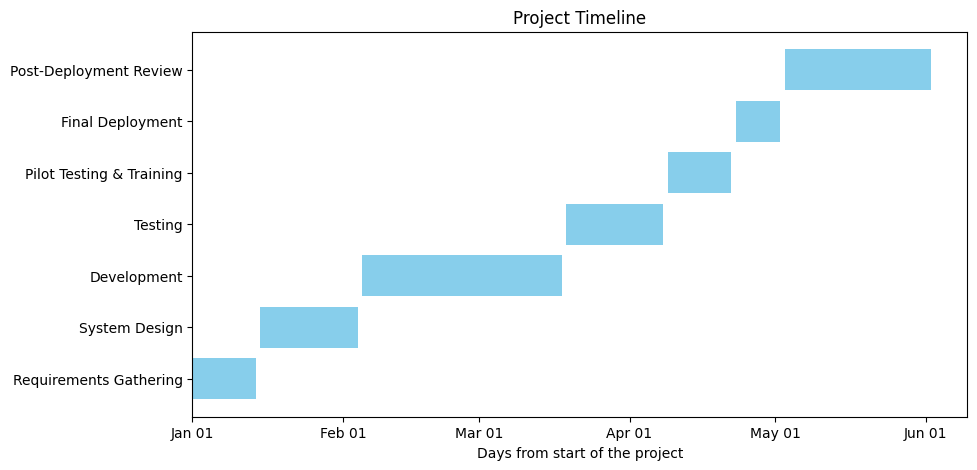

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Data setup
data = {
    "Milestone": [
        "Requirements Gathering", 
        "System Design", 
        "Development",
        "Testing",
        "Pilot Testing & Training",
        "Final Deployment",
        "Post-Deployment Review"
    ],
    "Start": [
        "2024-06-01", 
        "2024-06-15", 
        "2024-07-06",
        "2024-08-17",
        "2024-09-07",
        "2024-09-21",
        "2024-10-01"
    ],
    "Finish": [
        "2024-06-14", 
        "2024-07-05", 
        "2024-08-16",
        "2024-09-06",
        "2024-09-20",
        "2024-09-30",
        "2024-10-31"
    ]
}

df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['Finish'] = pd.to_datetime(df['Finish'])
df['Duration'] = df['Finish'] - df['Start']

# Calculate the bottom start position for each bar
start_pos = df['Start'].min()
df['bottom'] = (df['Start'] - start_pos).dt.days

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(df['Milestone'], df['Duration'].dt.days, left=df['bottom'], color='skyblue')
ax.set_xlabel('Days from start of the project')
ax.set_title('Project Timeline')

# Formatting dates
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()


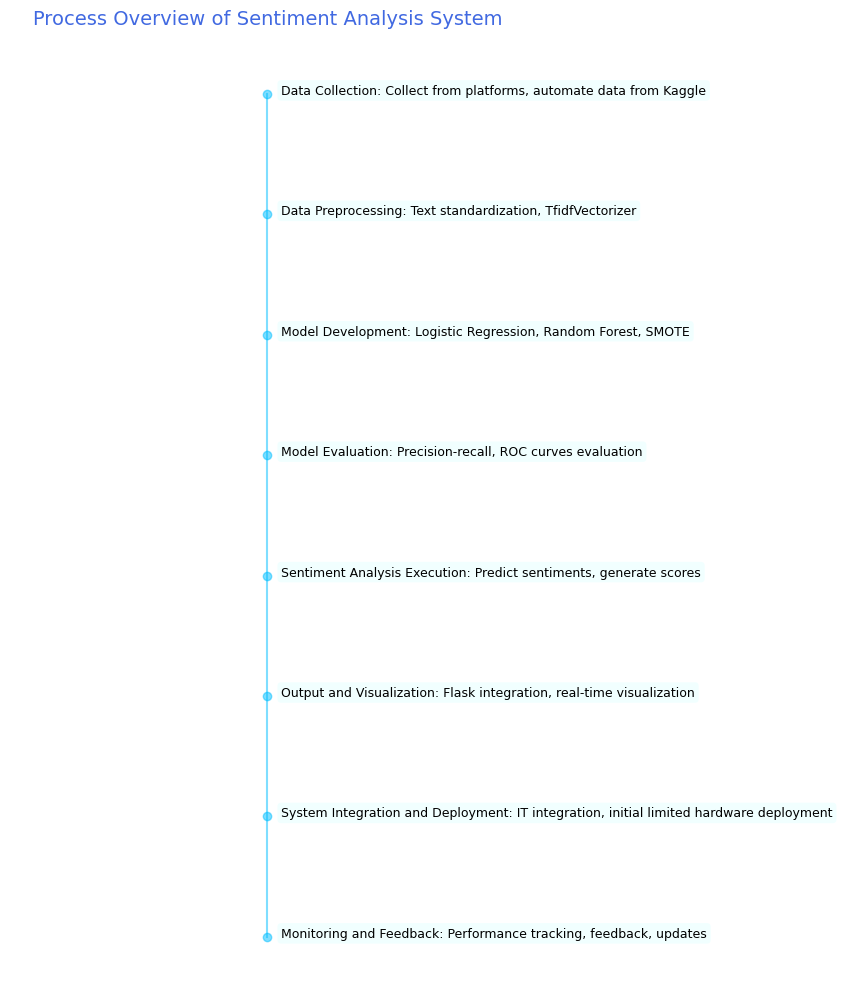

In [30]:
import matplotlib.pyplot as plt

# Define the stages and descriptions
stages = [
    "Data Collection", "Data Preprocessing", "Model Development",
    "Model Evaluation", "Sentiment Analysis Execution",
    "Output and Visualization", "System Integration and Deployment", "Monitoring and Feedback"
]
descriptions = [
    "Collect from platforms, automate data from Kaggle",
    "Text standardization, TfidfVectorizer",
    "Logistic Regression, Random Forest, SMOTE",
    "Precision-recall, ROC curves evaluation",
    "Predict sentiments, generate scores",
    "Flask integration, real-time visualization",
    "IT integration, initial limited hardware deployment",
    "Performance tracking, feedback, updates"
]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 10))  # taller figure for vertical layout

# Create a vertical baseline
ax.plot([0]*len(stages), range(len(stages)), 'o-', color='deepskyblue', alpha=0.5)

# Annotate each point in the process
for idx, (stage, desc) in enumerate(zip(stages, descriptions)):
    ax.annotate(f'{stage}: {desc}', (0, idx), textcoords="offset points", xytext=(10,0), ha='left', fontsize=9, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='azure', alpha=0.9))

# Remove axes and invert y-axis to have the flow top to bottom
ax.axis('off')
ax.set_ylim(ax.get_ylim()[::-1])

# Add title
plt.title('Process Overview of Sentiment Analysis System', fontsize=14, color='royalblue', pad=20)

# Display the plot
plt.tight_layout()
plt.show()


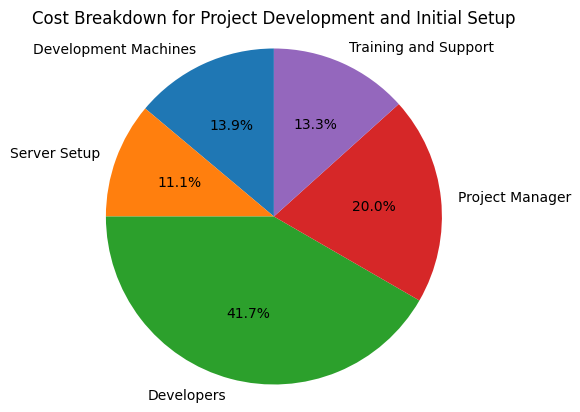

In [31]:
import matplotlib.pyplot as plt

# Define the costs
labels = 'Development Machines', 'Server Setup', 'Developers', 'Project Manager', 'Training and Support'
costs = [2500, 2000, 7500, 3600, 2400]  # Example costs based on assumptions about hours worked

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(costs, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Cost Breakdown for Project Development and Initial Setup')
plt.show()


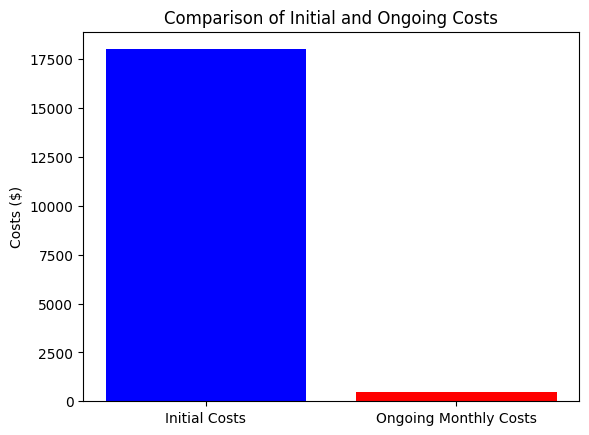

In [32]:
# Define the costs
categories = ['Initial Costs', 'Ongoing Monthly Costs']
initial_costs = 2500 + 2000 + 7500 + 3600 + 2400  # Sum of initial hardware and estimated human resources costs
ongoing_costs = 500  # Ongoing monthly costs for cloud services

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(categories[0], initial_costs, color='b')
ax.bar(categories[1], ongoing_costs, color='r')

plt.ylabel('Costs ($)')
plt.title('Comparison of Initial and Ongoing Costs')
plt.show()
